Columns: ['stock', 'action', 'overstock', 'sales', 'stockout', 'capacity', 'timestep']
Shape: (100, 7)

First 5 rows:
   stock  action  overstock  sales  stockout  capacity  timestep
0    1.0   0.015      0.015    0.0       0.0       1.0         0
1    1.0   0.015      0.015    0.0       0.0       1.0         1
2    1.0   0.015      0.015    0.0       0.0       1.0         2
3    1.0   0.015      0.015    0.0       0.0       1.0         3
4    1.0   0.015      0.015    0.0       0.0       1.0         4


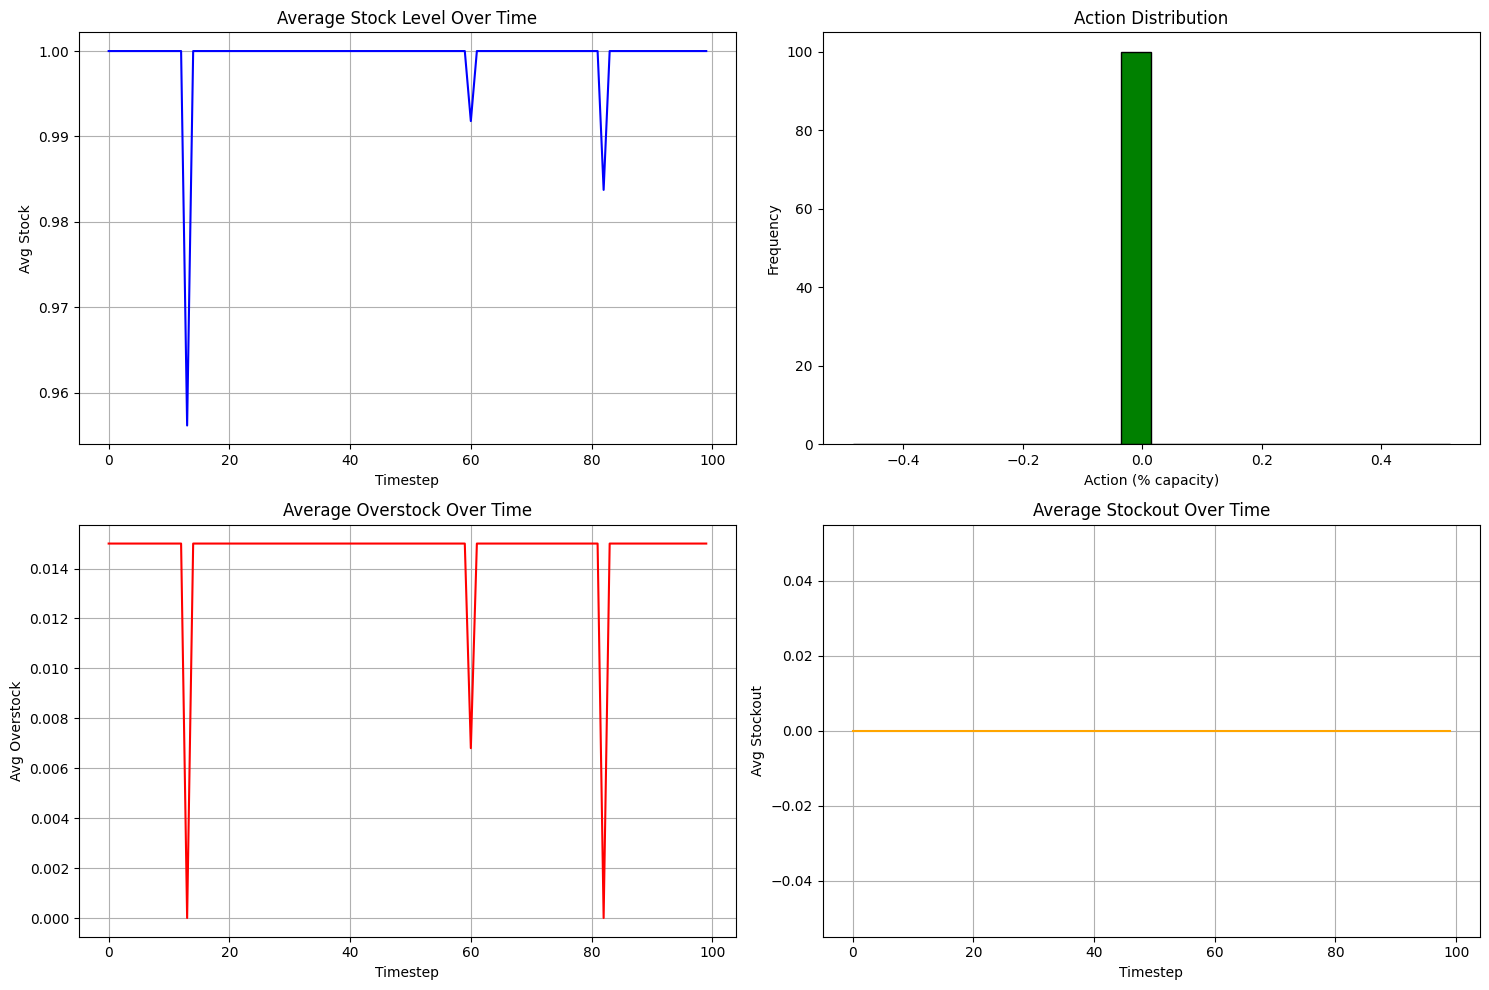

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Đọc file với format đặc biệt
with open('output.csv', 'r') as f:
    lines = f.readlines()

# Parse từng dòng
data = {}
for line in lines:
    if ':' in line:
        key, values = line.strip().split(':', 1)
        data[key] = [float(x) for x in values.split(',')]

# Chuyển thành DataFrame
df = pd.DataFrame(data)

# Tạo timestep index
df['timestep'] = range(len(df))

print("Columns:", df.columns.tolist())
print("Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

# ===== VẼ BIỂU ĐỒ =====
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Stock levels trung bình theo thời gian
if 'stock' in df.columns:
    stock_mean = df['stock'].apply(lambda x: np.mean(x) if isinstance(x, list) else x)
    axes[0, 0].plot(df['timestep'], stock_mean, color='blue')
    axes[0, 0].set_title('Average Stock Level Over Time')
    axes[0, 0].set_xlabel('Timestep')
    axes[0, 0].set_ylabel('Avg Stock')
    axes[0, 0].grid(True)

# 2. Actions distribution
if 'action' in df.columns:
    all_actions = [val for sublist in df['action'] for val in (sublist if isinstance(sublist, list) else [sublist])]
    axes[0, 1].hist(all_actions, bins=20, color='green', edgecolor='black')
    axes[0, 1].set_title('Action Distribution')
    axes[0, 1].set_xlabel('Action (% capacity)')
    axes[0, 1].set_ylabel('Frequency')

# 3. Overstock theo thời gian
if 'overstock' in df.columns:
    overstock_mean = df['overstock'].apply(lambda x: np.mean(x) if isinstance(x, list) else x)
    axes[1, 0].plot(df['timestep'], overstock_mean, color='red')
    axes[1, 0].set_title('Average Overstock Over Time')
    axes[1, 0].set_xlabel('Timestep')
    axes[1, 0].set_ylabel('Avg Overstock')
    axes[1, 0].grid(True)

# 4. Stockout rate (nếu có)
if 'stockout' in df.columns:
    stockout_mean = df['stockout'].apply(lambda x: np.mean(x) if isinstance(x, list) else x)
    axes[1, 1].plot(df['timestep'], stockout_mean, color='orange')
    axes[1, 1].set_title('Average Stockout Over Time')
    axes[1, 1].set_xlabel('Timestep')
    axes[1, 1].set_ylabel('Avg Stockout')
    axes[1, 1].grid(True)
else:
    axes[1, 1].text(0.5, 0.5, 'No stockout data', 
                    ha='center', va='center', fontsize=14)
    axes[1, 1].axis('off')

plt.tight_layout()
plt.show()